<a href="https://www.kaggle.com/code/rutwik1000/indian-commodity-prices?scriptVersionId=112722854" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Indian Commodity Analysis
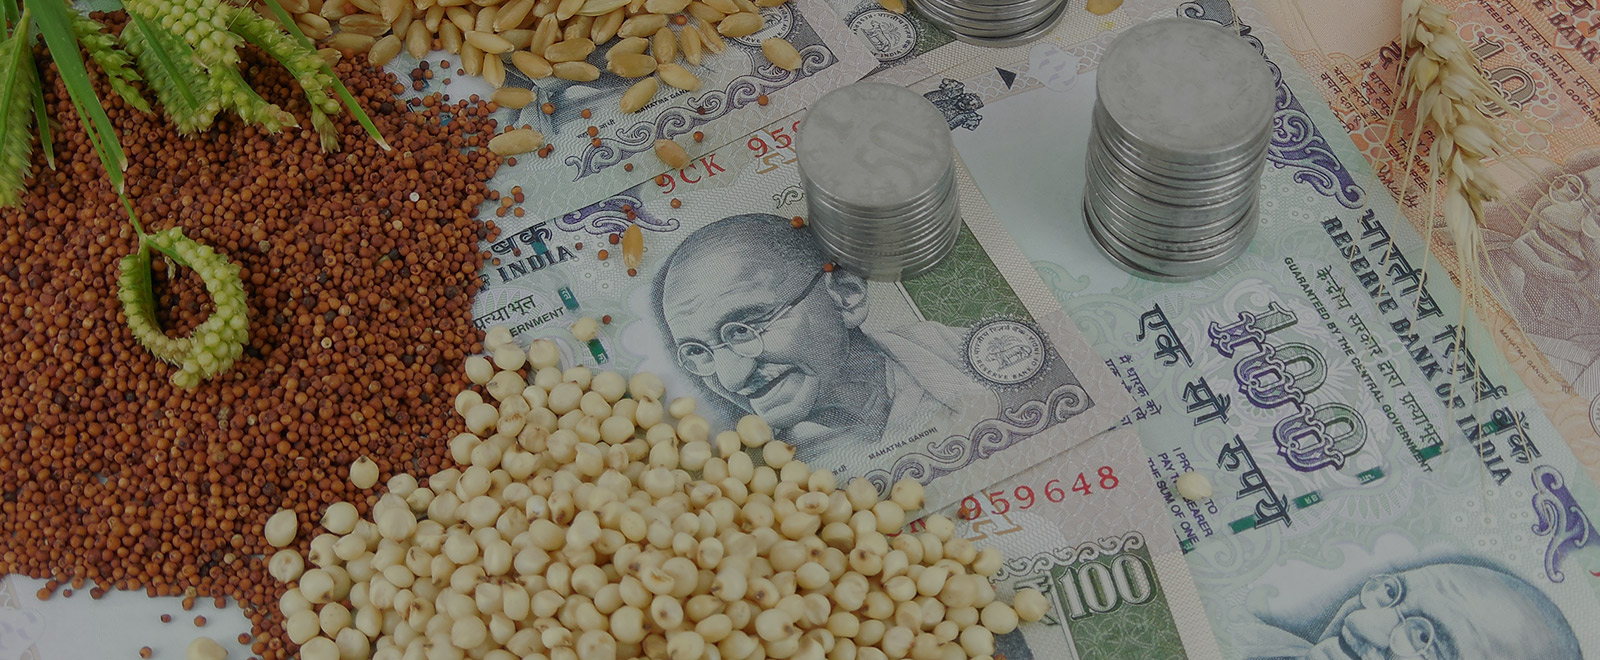

# Content📖
> 1. [Methodology](#1)
> 2. [Motivation](#2)
> 3. [Data Preprocessing](#3)\
>    3.1 [Column Transformation](#3.1)\
>    3.2 [Check Outliers](#3.2)
> 4. [EDA](#4)


# 1.Methodology🛠️<a id="1"></a>
> The first step of the project involves dealing with outliers, duplicate values. EDA invloves data visualizations like lineplot, heatmap, clustermap to assess the various trends between zones, months, commodities and states.

# 2.Motivation💡 <a id="2"></a>
> Motivation for creation of this dataset was to address following questions :
> - Which distribution of demands of commodities in a year.
> - How yhe prices of commodities change over a year?
> - Which are the high value commodities in India?
> - Which states have demand for which commodity?
> - What is inter correlation of states between the prices?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df=pd.read_csv('../input/commodity-dataset/Agri_data.csv',parse_dates=['date'],dayfirst=True)
# Converting float 64 into float 32
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)

# 3.Data Preprocessing <a id="3"></a>

## 3.1.Column Transformation <a id="3.1"></a>

## 3.1.1.Classification of States into Zones

In [3]:
# Creating a column for Zone
df1=pd.read_csv('../input/commodity-dataset/commodity_labelled.csv')
df2=pd.read_csv('/kaggle/input/commodity-dataset/Indian Zones.csv')

df1.sample(5)

,commodity_name,commodity_type
197,Camel+Hair,Other
15,Paddy(Dhan)(Common),Cereals
199,Green+Fodder,Other
262,Alsandikai,Vegetables
168,Javi,Other


In [4]:
df.describe()

,min_price,max_price,modal_price
count,590670.000000,590670.000000,590670.000000
mean,28.688293,34.561928,31.673246
std,44.214794,82.656937,35.656208
min,0.000000,0.000000,0.010000
25%,12.500000,16.000000,15.000000
50%,20.000000,25.000000,23.000000
75%,35.849998,42.000000,39.599998
max,10000.000000,25500.000000,4600.000000


### 3.1.2 Consolidation into Monthly data

In [5]:
# Converting daily data into Monthly and dropping max and min price
df=(df.groupby([pd.Grouper(key='date', freq='MS'),'commodity_name', 'state', 'district', 'market'])['modal_price']
   .mean()).reset_index()

### 3.1.3.Consolidation of Multiple District Markets



In [6]:
df = df.groupby(['date', 'commodity_name', 'state','district'], as_index=False).mean()      

In [7]:
# Creating a column for month
df['month']=df['date'].dt.month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

### 3.1.3 Classification of Commodities into Groups

In [8]:
df = pd.merge(df,df1,on ='commodity_name',how ='left')
df=pd.merge(df,df2,on ='state',how ='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58145 entries, 0 to 58144
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            58145 non-null  datetime64[ns]
 1   commodity_name  58145 non-null  object        
 2   state           58145 non-null  object        
 3   district        58145 non-null  object        
 4   modal_price     58145 non-null  float32       
 5   month           58145 non-null  object        
 6   commodity_type  58145 non-null  object        
 7   zone            39363 non-null  object        
dtypes: datetime64[ns](1), float32(1), object(6)
memory usage: 3.8+ MB


In [9]:
df.sample(5)

,date,commodity_name,state,district,modal_price,month,commodity_type,zone
54813,2019-12-01,Linseed,Uttar Pradesh,Mahoba,48.326668,Dec,Oil Seeds,NaN
29961,2019-09-01,Brinjal,Assam,Barpeta,27.350000,Sep,Vegetables,North Eastern
1114,2019-05-01,Brinjal,Uttar Pradesh,Gorakhpur,10.700000,May,Vegetables,NaN
50427,2019-11-01,Tomato,West Bengal,Jalpaiguri,49.000000,Nov,Vegetables,Eastern
12519,2019-06-01,Pomegranate,Punjab,Gurdaspur,64.333336,Jun,Fruits,North Western


## 3.2.Checking for Outliers <a id="3.2"></a>

###  3.2.1.Monthwise Outliers

<AxesSubplot:xlabel='modal_price', ylabel='month'>

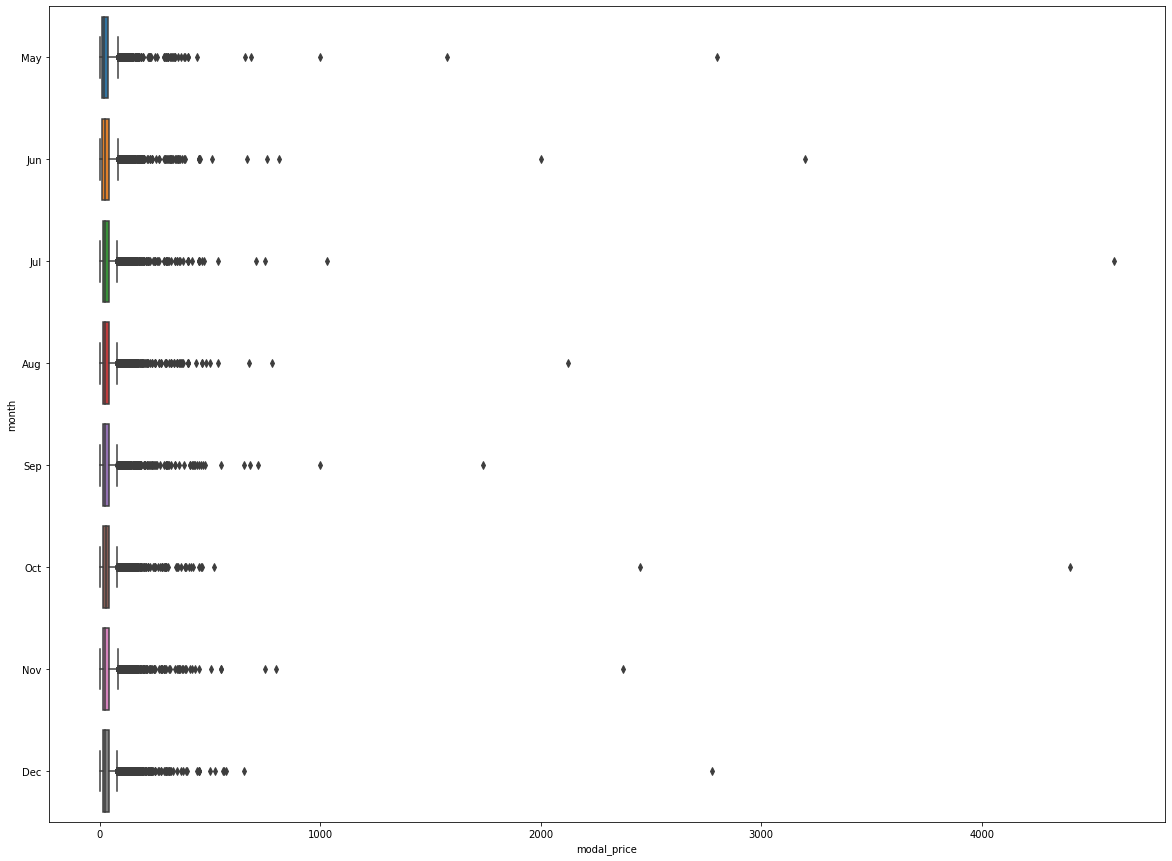

In [10]:
#%matplotlib inline
plt.figure(figsize=(20,15))
sns.boxplot(x=df['modal_price'],y=df['month'])
#plt.show()

> 1. Most of the boxplots lie under the range of Rs 1000
> 2. Outliers are occuring consitently.To Study this,Zonewise boxplots are plotted below.

### 3.2.2.Zonewise Outliers

<AxesSubplot:xlabel='modal_price', ylabel='zone'>

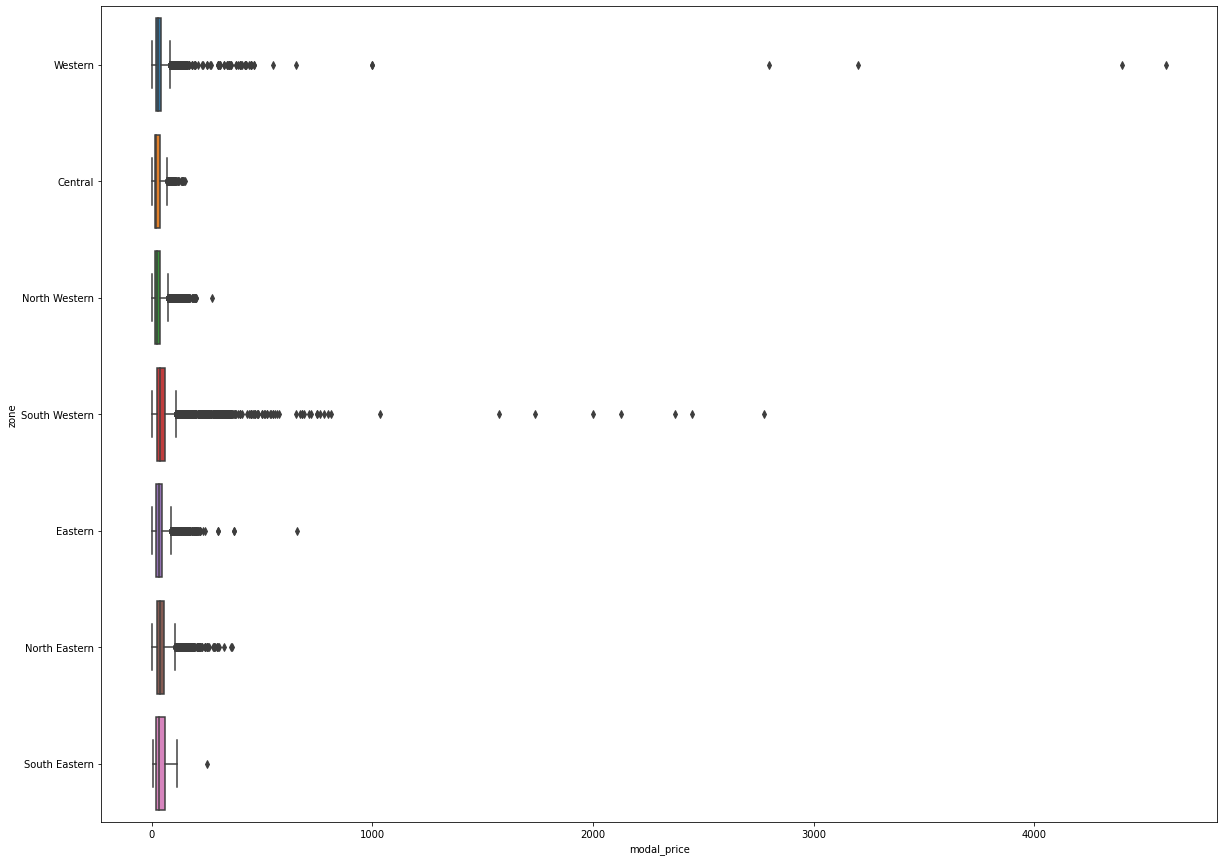

In [11]:
plt.figure(figsize=(20,15))
sns.boxplot(x=df['modal_price'],y=df['zone'])

> 1.The Extreme outliers in causing zones are South Western and Western.
> 2.Apart from that all other zones show prices in common range.

### 3.2.3.Outliers in Commodity Type 

<AxesSubplot:xlabel='modal_price', ylabel='commodity_type'>

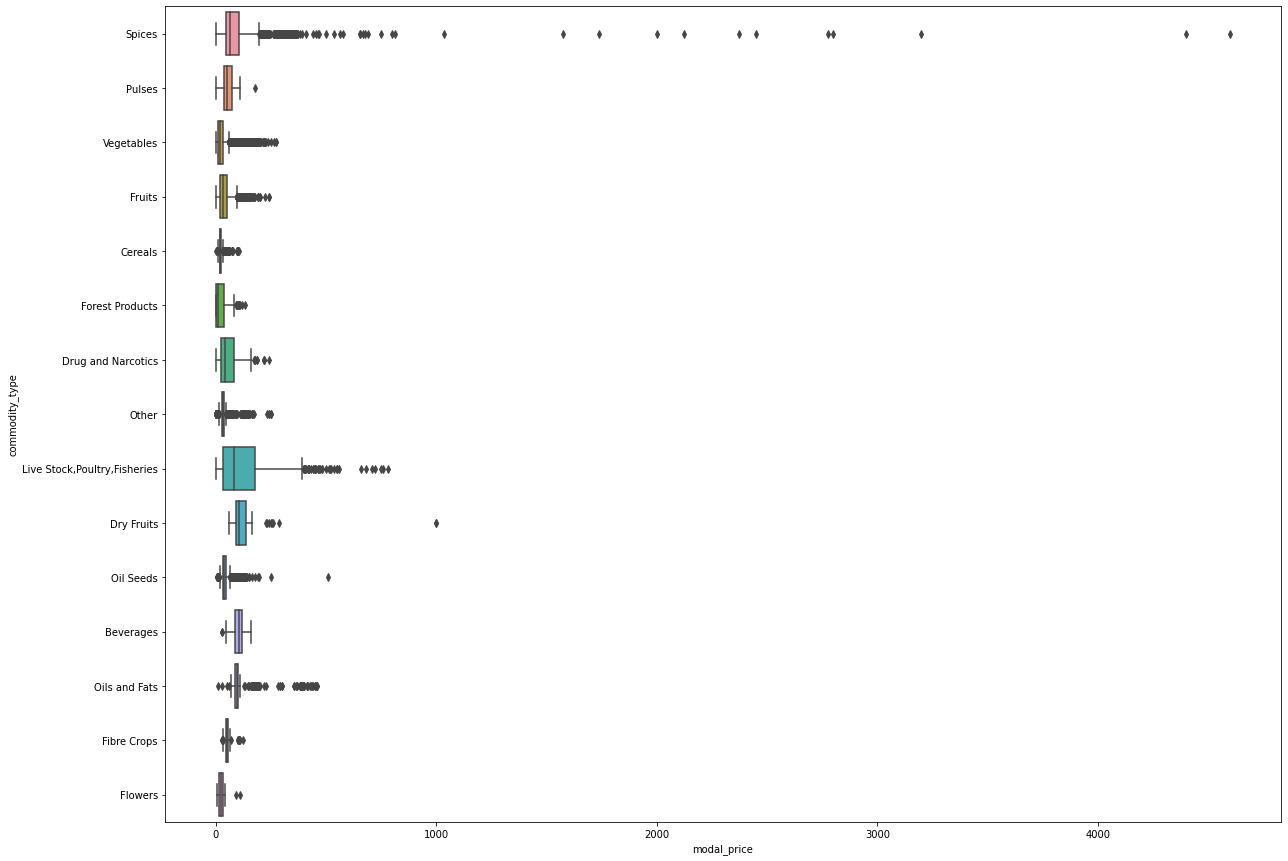

In [12]:
plt.figure(figsize=(20,15))
sns.boxplot(x=df['modal_price'],y=df['commodity_type'])

> 1.Spices are causing most of the outliers.This is examined in the following cell.
> 2.Dry Fruit only shows only one outlier which is above 1000.

### 3.2.4.Outliers in Spices 

<AxesSubplot:xlabel='modal_price', ylabel='commodity_name'>

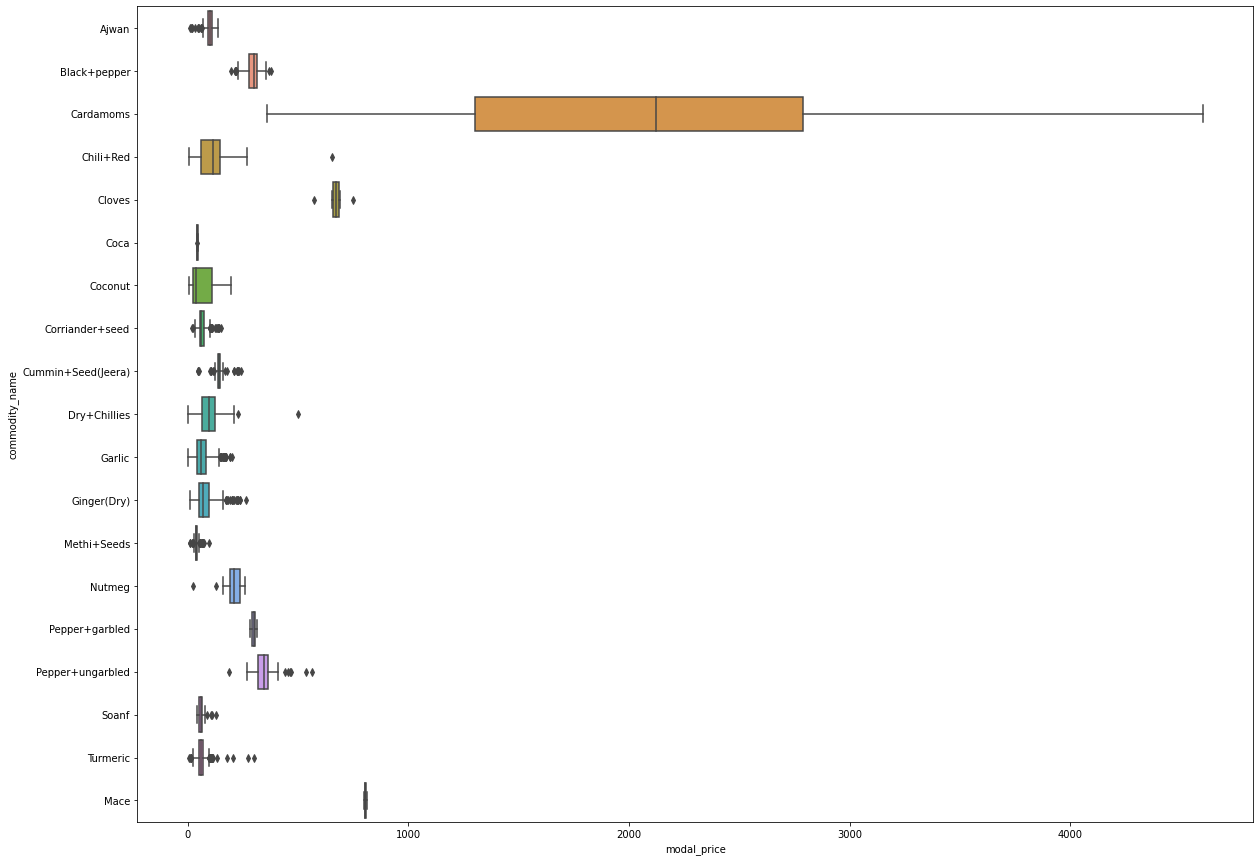

In [13]:
plt.figure(figsize=(20,15))
sns.boxplot(x=df[df['commodity_type']=='Spices']['modal_price'],
            y=df[df['commodity_type']=='Spices']['commodity_name'])

> 1.As shown in the above graphic,outliers are caused due to Cardamoms which show consistent boxplot. Hence,no further action is taken,

### 3.2.5.Outliers in Dry Fruits

<AxesSubplot:xlabel='modal_price', ylabel='commodity_name'>

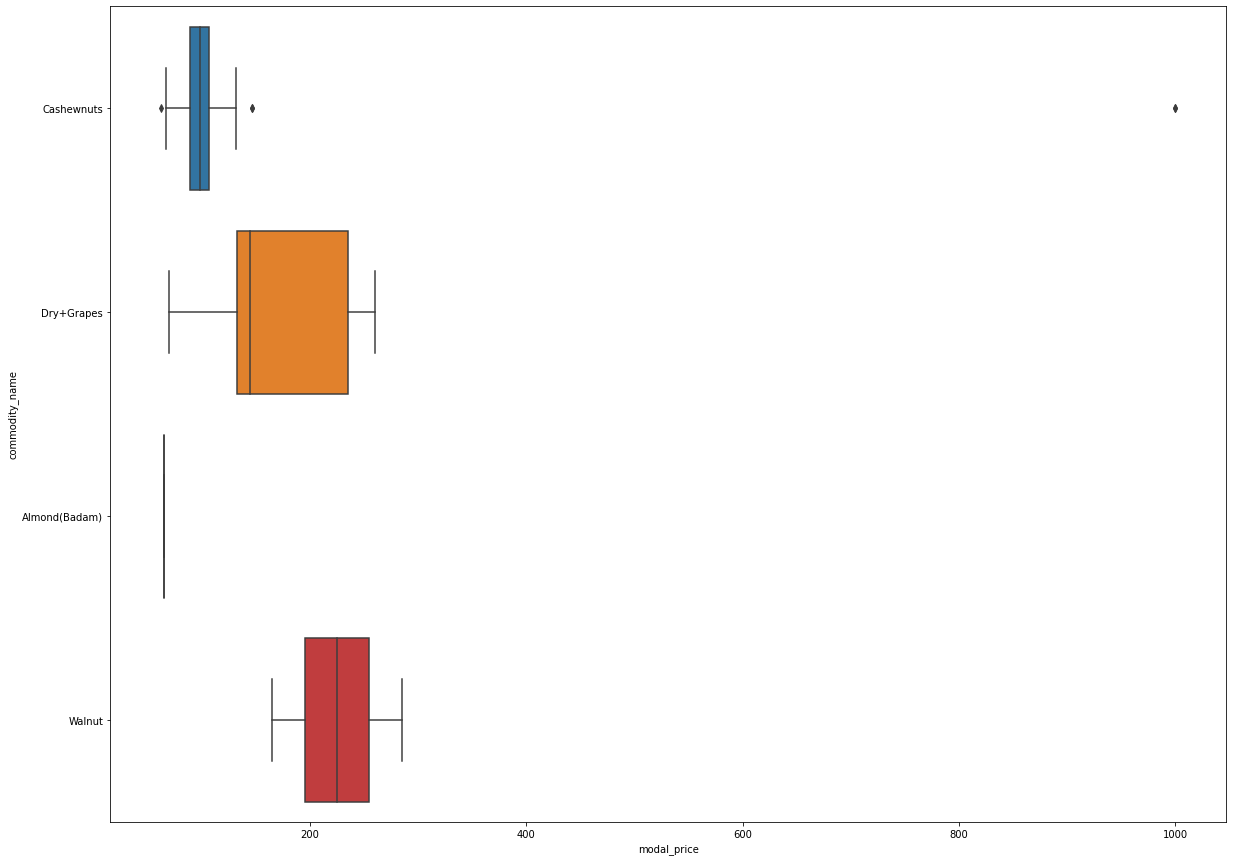

In [14]:
plt.figure(figsize=(20,15))
sns.boxplot(x=df[df['commodity_type']=='Dry Fruits']['modal_price'],
            y=df[df['commodity_type']=='Dry Fruits']['commodity_name'])

> 1.The single outlier lies far away from the IQR range.\
> 2.Apart from that Almond shows very narrow range.\
> These two are investigated further.

#### 3.2.6.Outliers in Cashewnuts

In [15]:
df[df['commodity_name']=='Cashewnuts']

,date,commodity_name,state,district,modal_price,month,commodity_type,zone
1500,2019-05-01,Cashewnuts,Goa,North Goa,130.000000,May,Dry Fruits,Western
1501,2019-05-01,Cashewnuts,Karnataka,Kolar,132.000000,May,Dry Fruits,South Western
1502,2019-05-01,Cashewnuts,Karnataka,Udupi,94.142502,May,Dry Fruits,South Western
1503,2019-05-01,Cashewnuts,Kerala,Kannur,83.750000,May,Dry Fruits,South Western
1504,2019-05-01,Cashewnuts,Kerala,Kasargod,83.500000,May,Dry Fruits,South Western
1505,2019-05-01,Cashewnuts,Maharashtra,Mumbai,1000.000000,May,Dry Fruits,Western
1506,2019-05-01,Cashewnuts,Odisha,Gajapati,106.666664,May,Dry Fruits,Eastern
1507,2019-05-01,Cashewnuts,Tamil Nadu,Ariyalur,81.333336,May,Dry Fruits,South Eastern
8625,2019-06-01,Cashewnuts,Goa,North Goa,120.000000,Jun,Dry Fruits,Western
8626,2019-06-01,Cashewnuts,Karnataka,Karwar(Uttar Kannad),93.974998,Jun,Dry Fruits,South Western


In [16]:
df[df['commodity_name']=='Cashewnuts']['modal_price'].median()

98.48485

> - Both instances of outlier are from Mumbai in the month of September and July with same value of 1000.
> - The value 10x of the median value i.e 98.45 ≈ 100.
> - Therefore,replace the values with median.

In [17]:
df['modal_price'] = df['modal_price'].replace([1000,1000],98.48485)

#### 3.2.7.Check the Irregular behaviour of Almonds

In [18]:
df[df['commodity_name']=='Almond(Badam)']

,date,commodity_name,state,district,modal_price,month,commodity_type,zone
14525,2019-07-01,Almond(Badam),Himachal Pradesh,Shimla,65.0,Jul,Dry Fruits,North Western


> - Almond was exhibiting a very narrow range of boxplot.
> - The reason being occurence of a single value.

# 4.EDA <a id="4"></a>

<AxesSubplot:xlabel='month', ylabel='modal_price'>

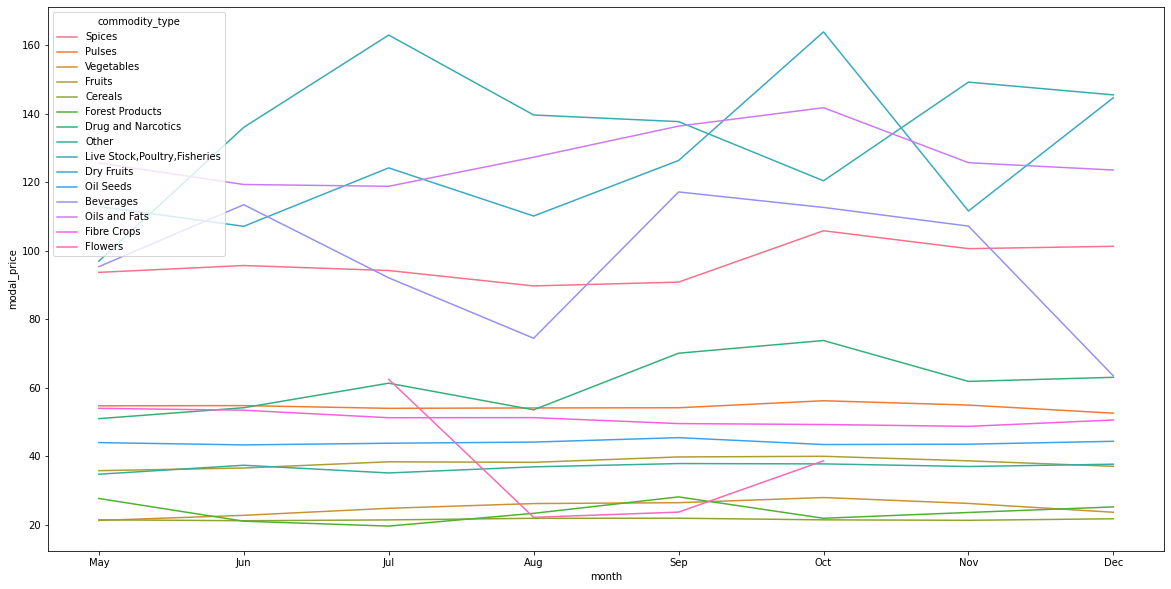

In [19]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x=df['month'],y=df['modal_price'],
             hue=df['commodity_type'],ci=None)

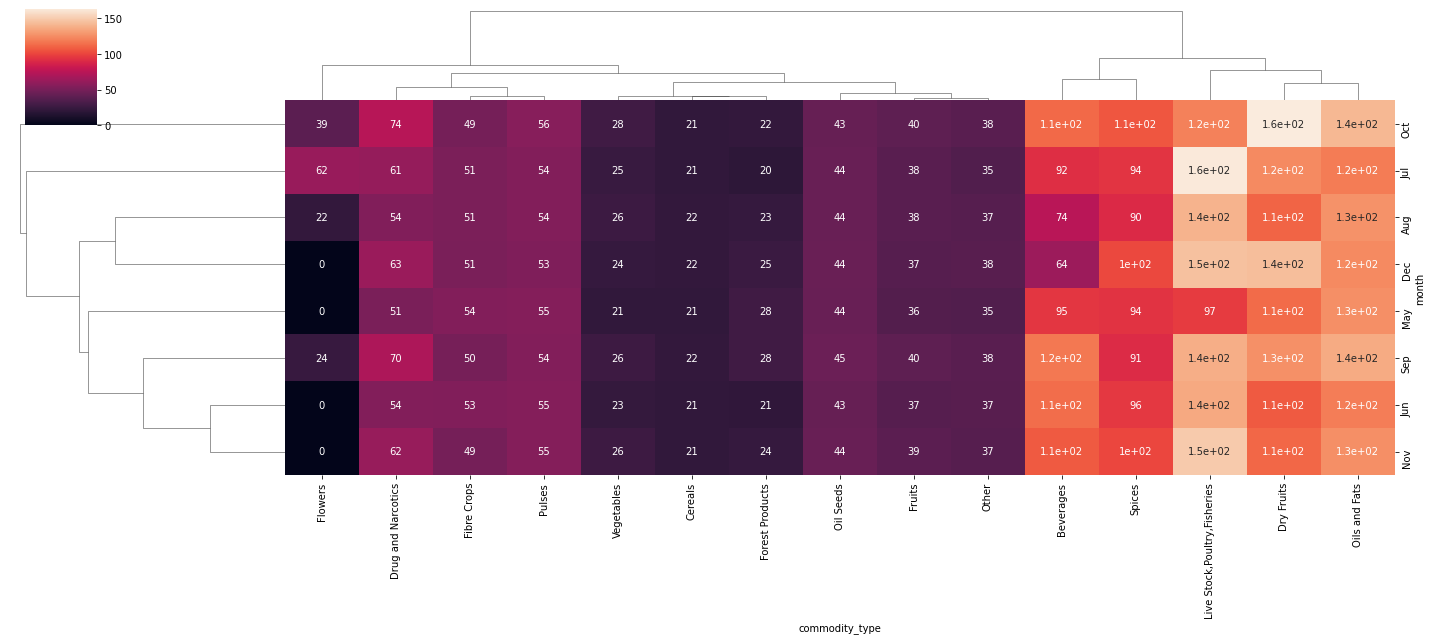

In [20]:
sns.clustermap(pd.crosstab(index=df['month'],columns=df['commodity_type'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

The above Clustermap shows the Catogry-Monthly data for May-Dec 2019:
1. Dry Fruits is the second most Volatile Category behind Beverages(Only in Kerala).The prices can surge upto 109% within a month.
2. Flower prices also shoot up explosively in the winter season and have negligible demand in the Summer Season.
3. Cereals is the most stable Category with the least deviation of 4.7%.
4. The prices of Spices shoots up drastically in the winters.(Where1)


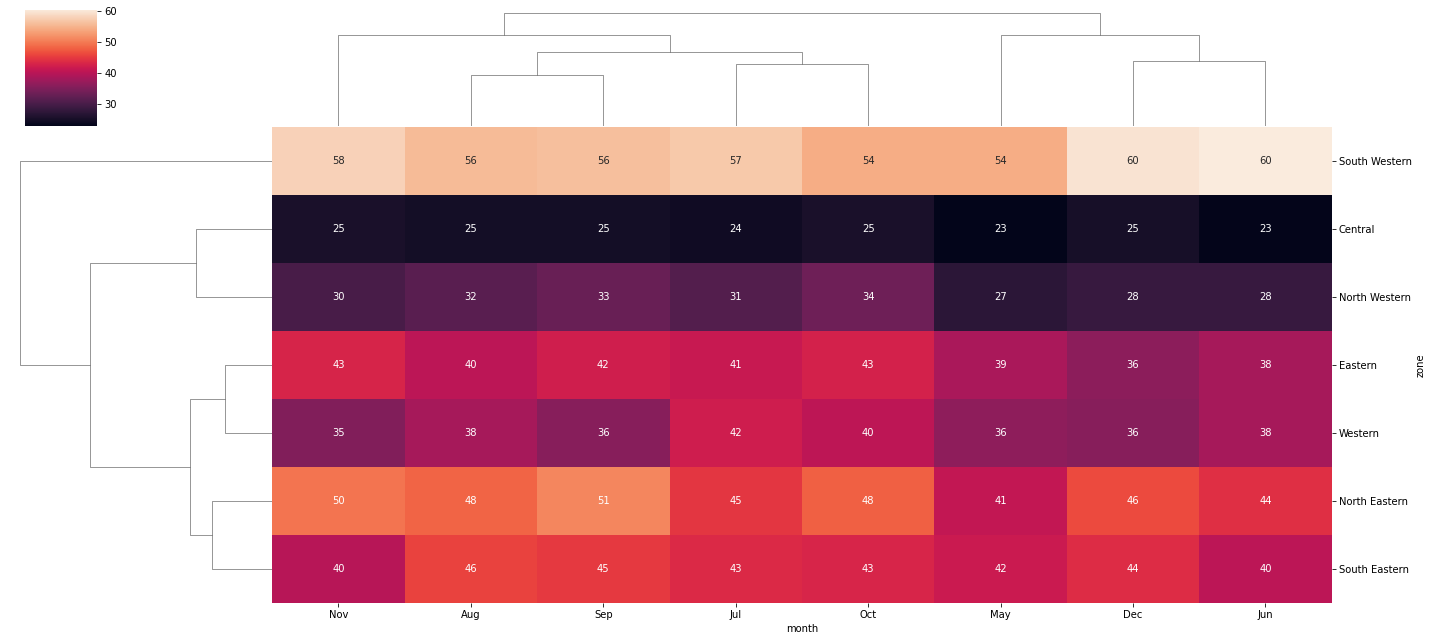

In [21]:
sns.clustermap(pd.crosstab(index=df['zone'],columns=df['month'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

1. South Western markets are the costliest throughout the year.(Why1)
2. North Western and Central Region remains inexpensive and flat throughout.

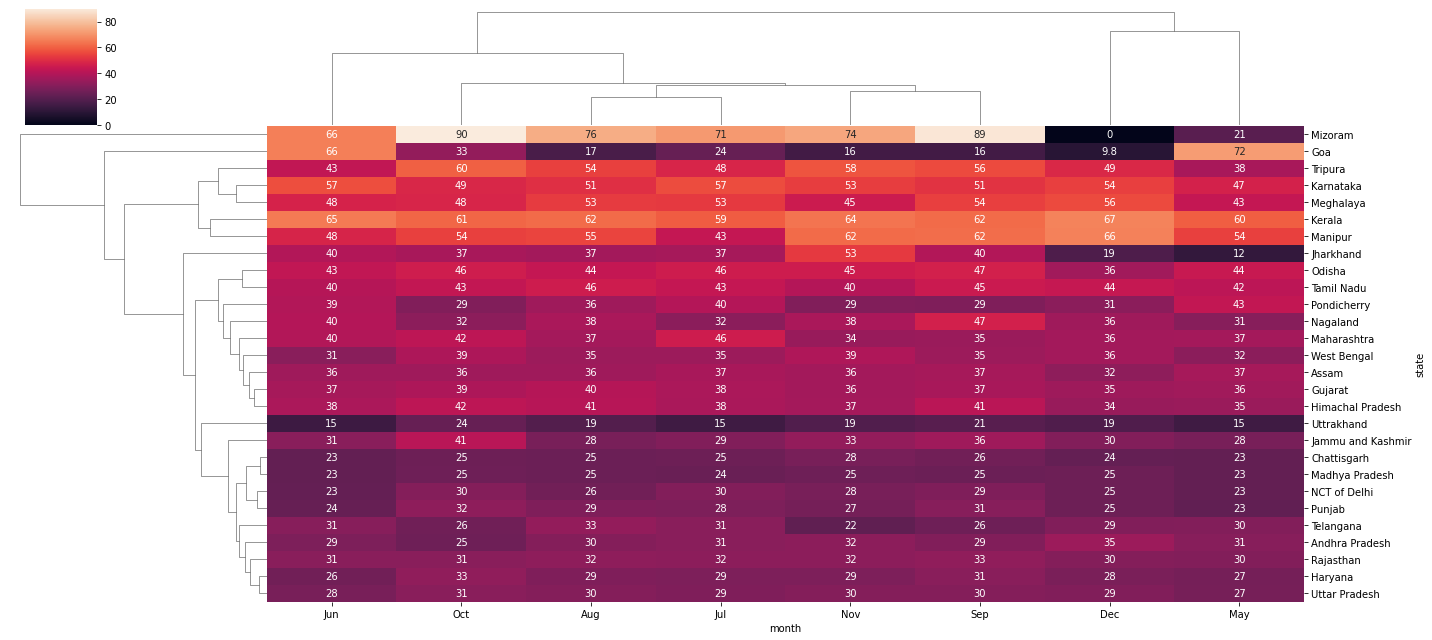

In [22]:
sns.clustermap(pd.crosstab(index=df['state'],columns=df['month'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

1. Goa and Jharkhand are the most volatile market.The prices can change by 178% in 1 month. 
2. Madhya Pradesh and Chattisgarh show the least devaition of 0.9% and 2% respectively.They are also the least expensive market.
3. Mizoram,Kerala and Manipur are the most expensive markets wheares Uttrakhand is the least expensive market.

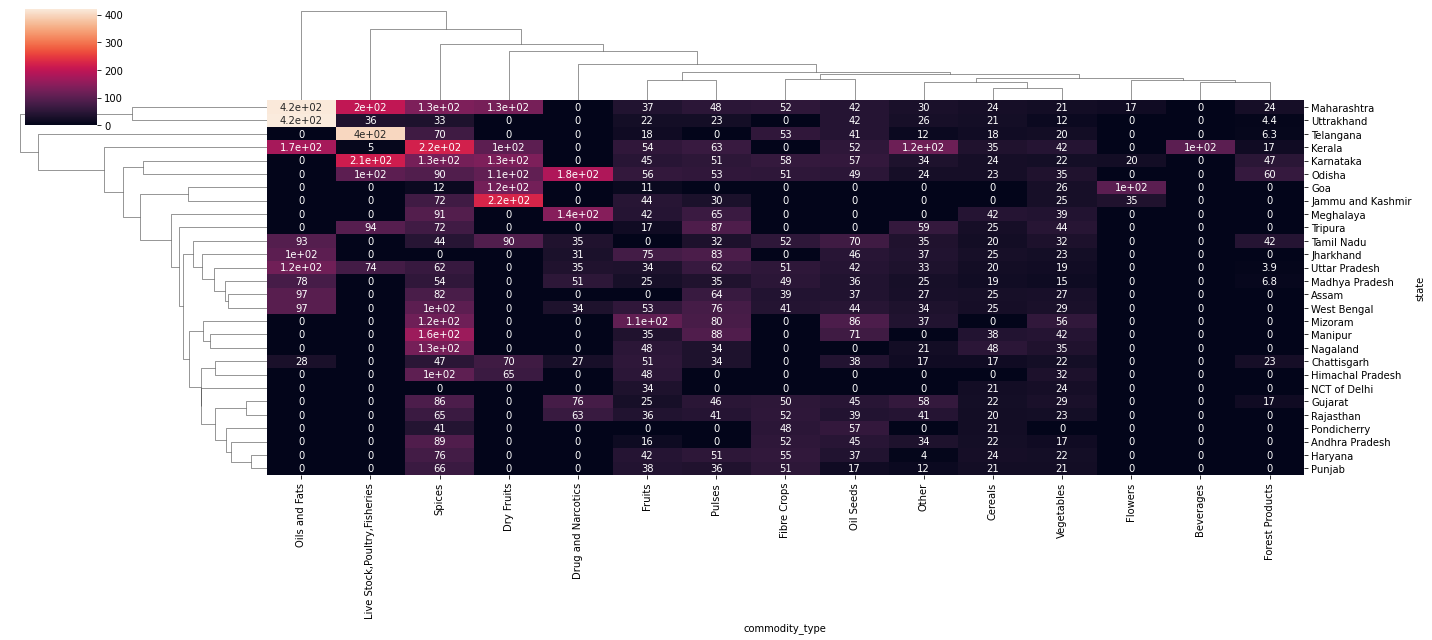

In [23]:
sns.clustermap(pd.crosstab(index=df['state'],columns=df['commodity_type'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

> 1. The prices of Spices are high in Kerla, Manipur, Maharashtra (Where1)

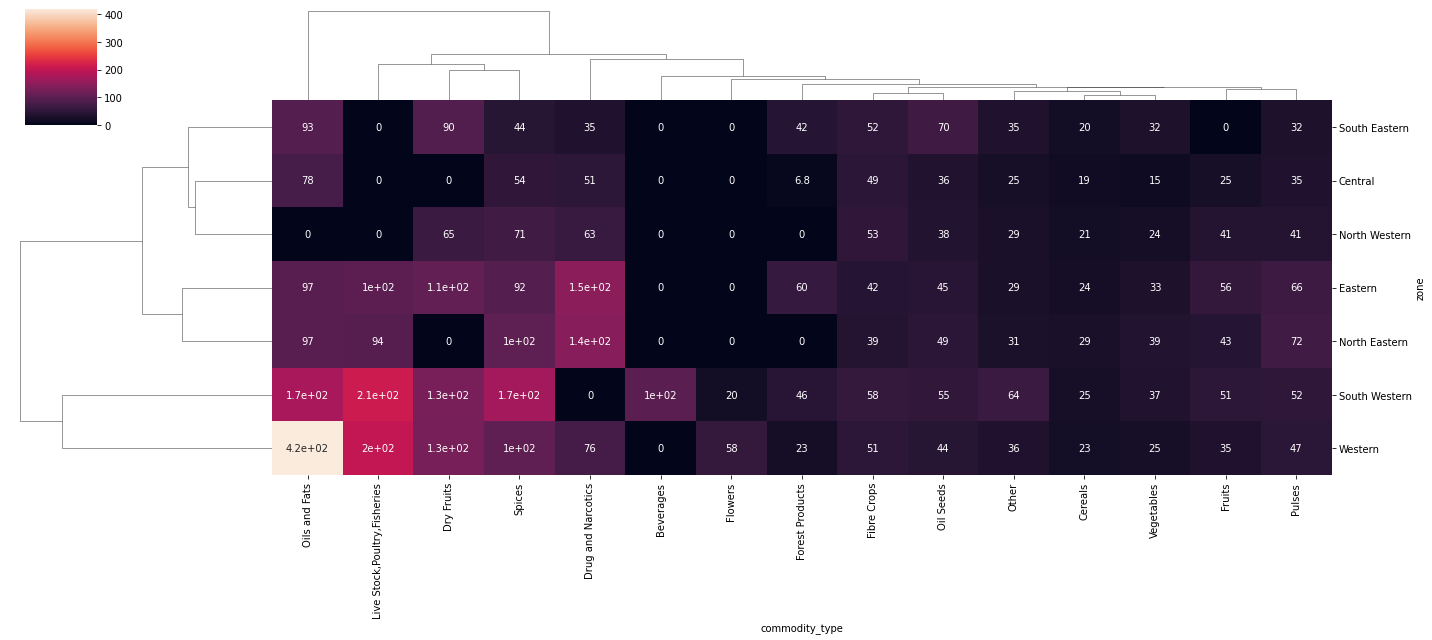

In [24]:
sns.clustermap(pd.crosstab(index=df['zone'],columns=df['commodity_type'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

> 1. The Zone vs Commodity clustermap shows South Western region to be most expensive the main contributors to that are the high value categories like Dry Fruits,Oils and Fats and Spices.
> 2. North Western regions have lower prices for high value commodities but the prices of Fibre Crops are above average.
> 3. Drug and Narcotics are in demand in Eastern and North Eastern zones.
> 4. Western region has strongest demand for high value categories like Dry Fruits, Oils and Fats alongside with Livestock,Poultry,Fisheries. 
> 5. Central and North western have low demand for Spices and Dry fruits that is why they remain inexpensive.(Why) 

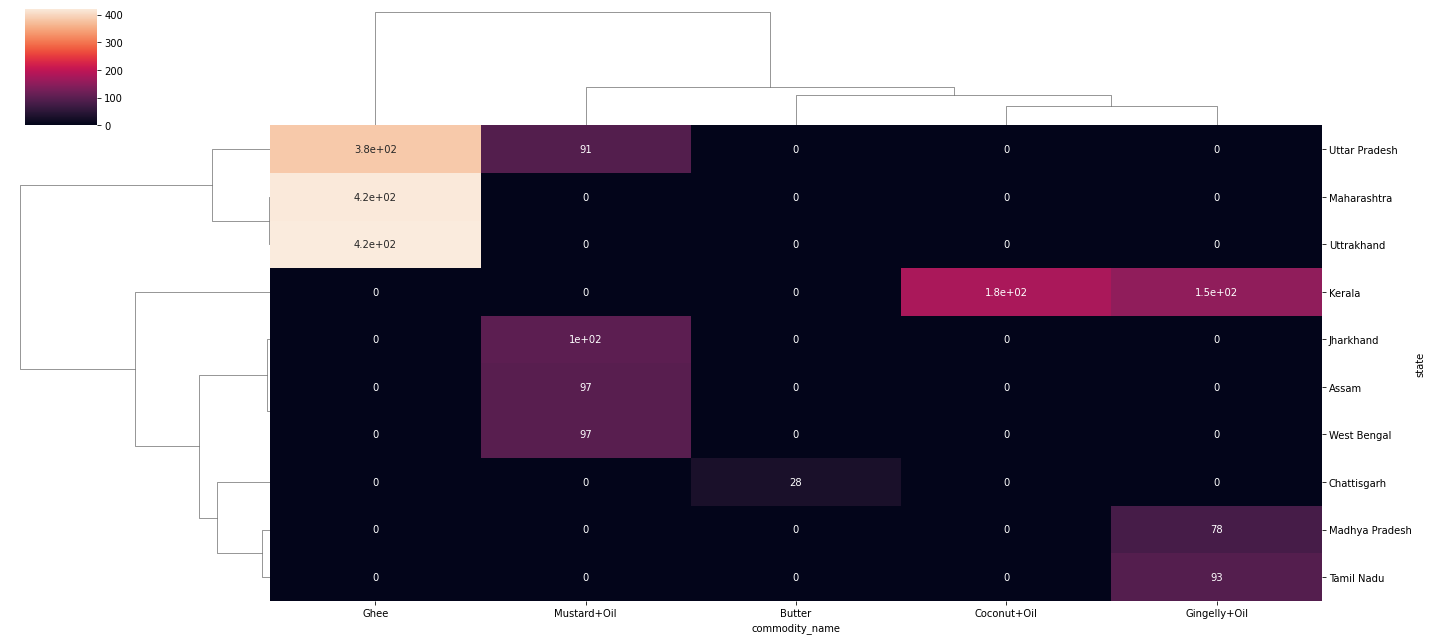

In [25]:
sns.clustermap(pd.crosstab(index=df['state'],columns=df[df['commodity_type']=='Oils and Fats']['commodity_name'],
                           values=df.modal_price,aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

This chart is plotted to investigate about sharp increase in prices of Oils and Fats Category in MH,UP,UK.
Ghee is solely responsible for driving the prices of the category.

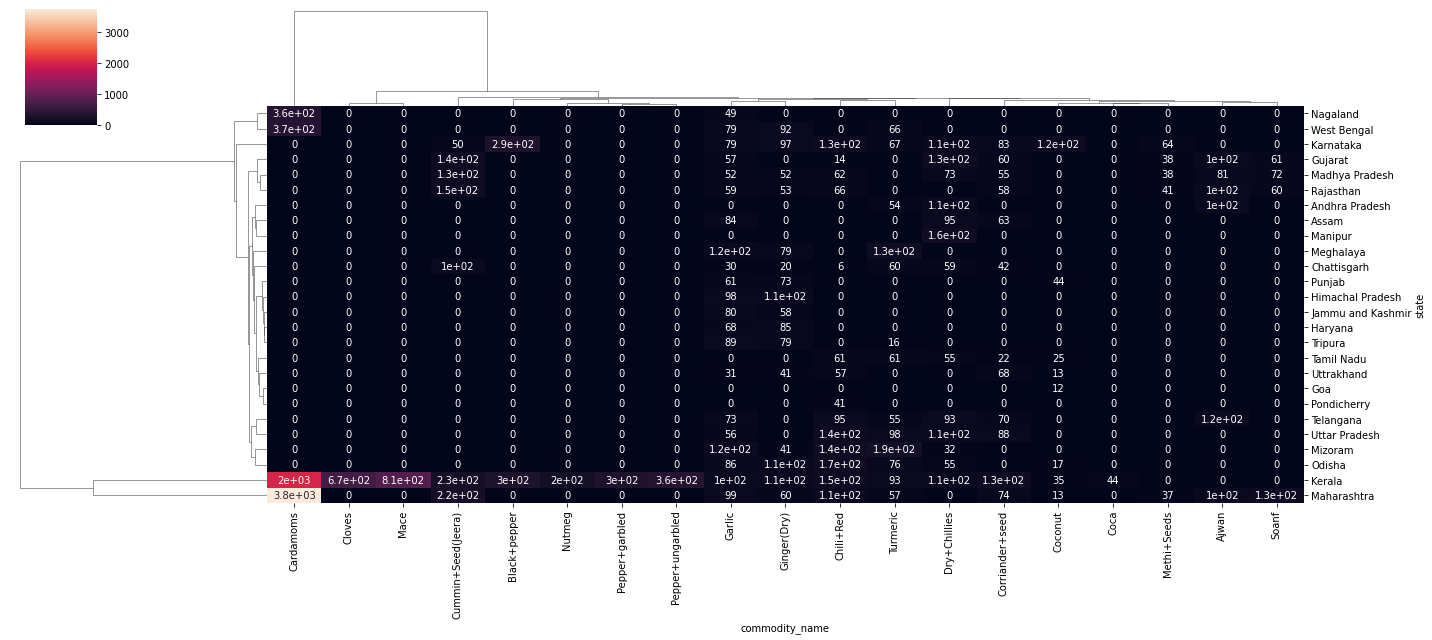

In [26]:
sns.clustermap(pd.crosstab(index=df['state'],columns=df[df['commodity_type']=='Spices']['commodity_name'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

1. Kerla is hotspot for spices.The markets are trading almost all of the spices.Turmeric,
2. Red Chillies are in demand in Maharashtra,Kerala,UP,Mizoram,Odisha and Karnataka but are cheaply available in Gujrat,MP,Rajasthan,Uttrakhand,Pondicherry and Tamil Nadu.

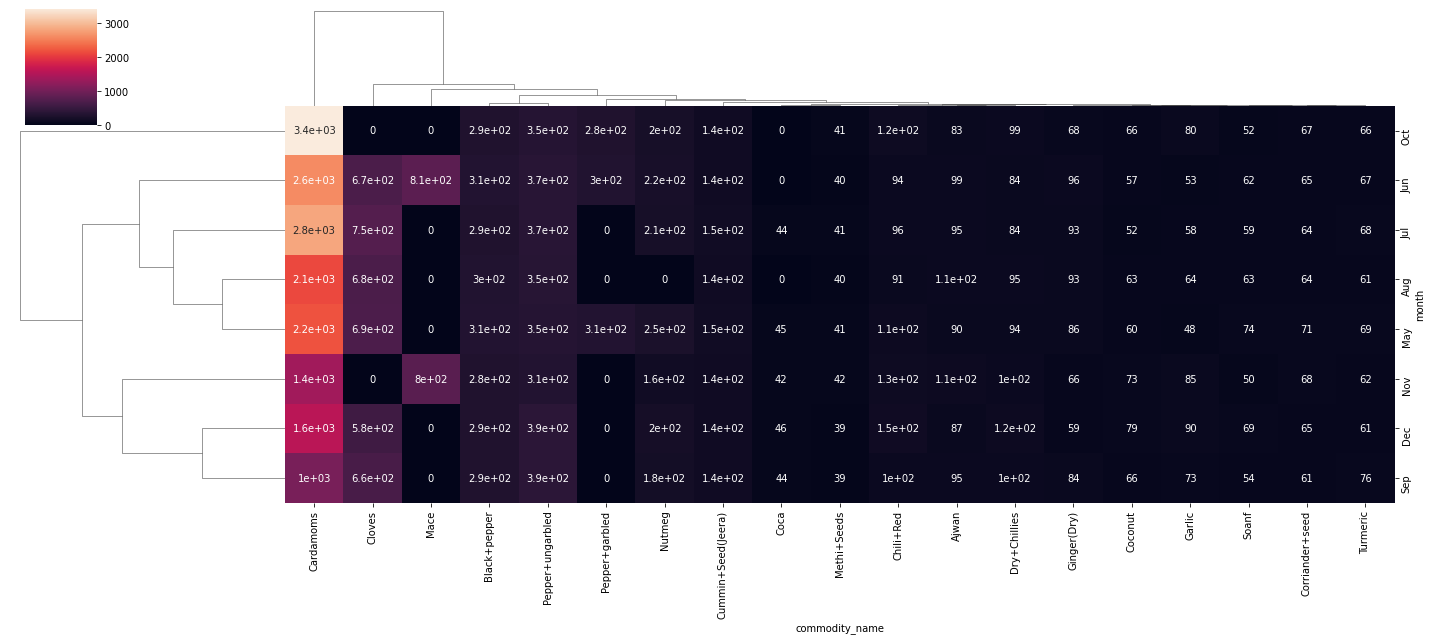

In [27]:
sns.clustermap(pd.crosstab(index=df['month'],columns=df[df['commodity_type']=='Spices']['commodity_name'],values=df.modal_price,
                           aggfunc=np.average).fillna(0),figsize=(20,9),annot=True)

1. Cardamoms are the most expensive amongst the Spices Categotry.The Prices are lower in winter but rise in summer and rainy season.
2. Cloves are second in line with terms of price.The prices are high but remain stable (29.3%) compared to Cardamom.
3. Red Chillies are in demand in Winter season.

<AxesSubplot:xlabel='month', ylabel='modal_price'>

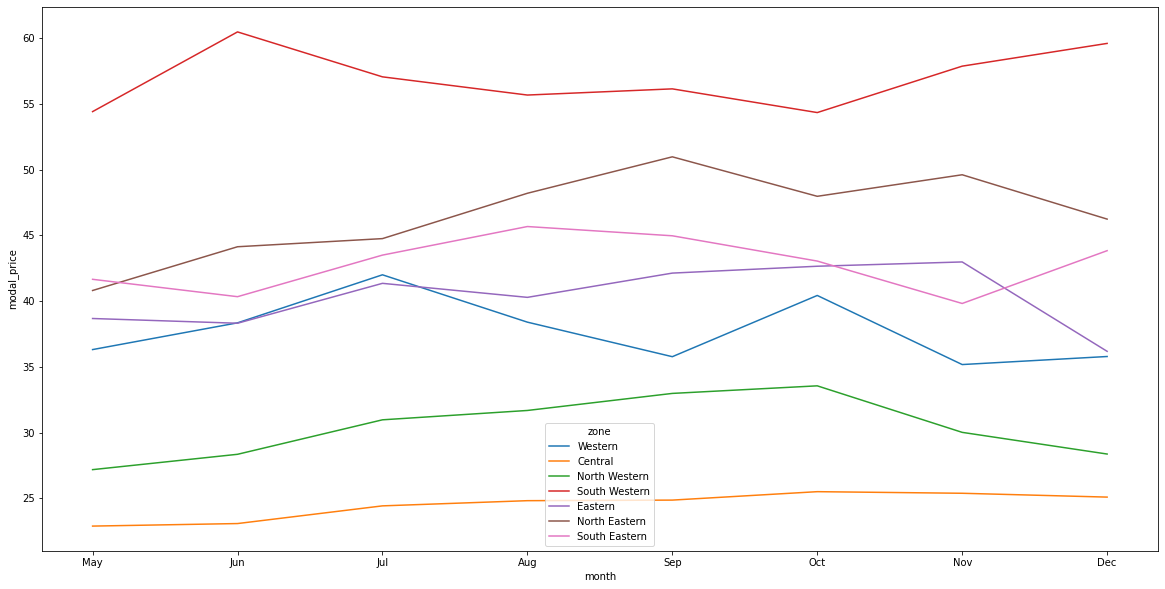

In [28]:
plt.subplots(figsize=(20, 10))
sns.lineplot(x=df['month'],y=df['modal_price'],hue=df['zone'],ci=None)

<AxesSubplot:xlabel='state', ylabel='state'>

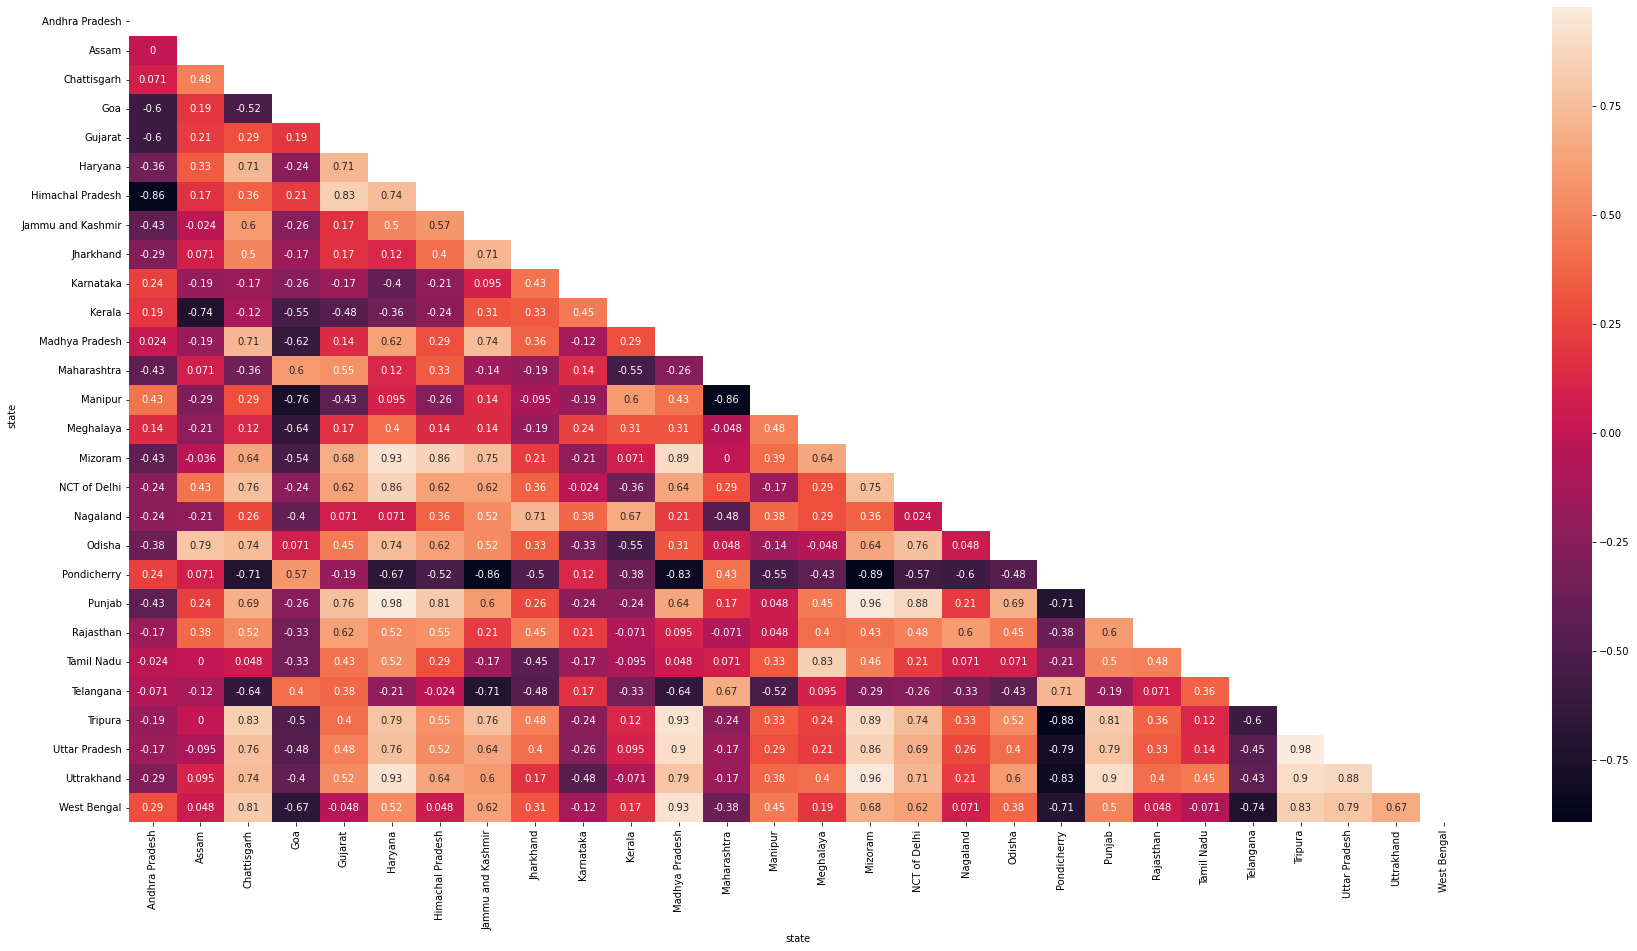

In [29]:
table = df.groupby(['month','state'], as_index=False).mean()
state_corr=df.groupby(['month','state'])['modal_price'].aggregate('mean').unstack()
plt.subplots(figsize=(30, 15))
mask=np.triu(np.ones_like(state_corr.corr(method='spearman')))
sns.heatmap(state_corr.corr(method='spearman'), annot = True,mask=mask)

> 1. Mahrashtra shows strong negative correlation with Manipur.
> 2. Pondicherry, Goa, Telangana show negative correlation with most of the states.
> 3. Madhya Pradesh shows strong positive correlation with West Bengal, UP, Tripura and Mizoram.

<AxesSubplot:xlabel='commodity_type', ylabel='commodity_type'>

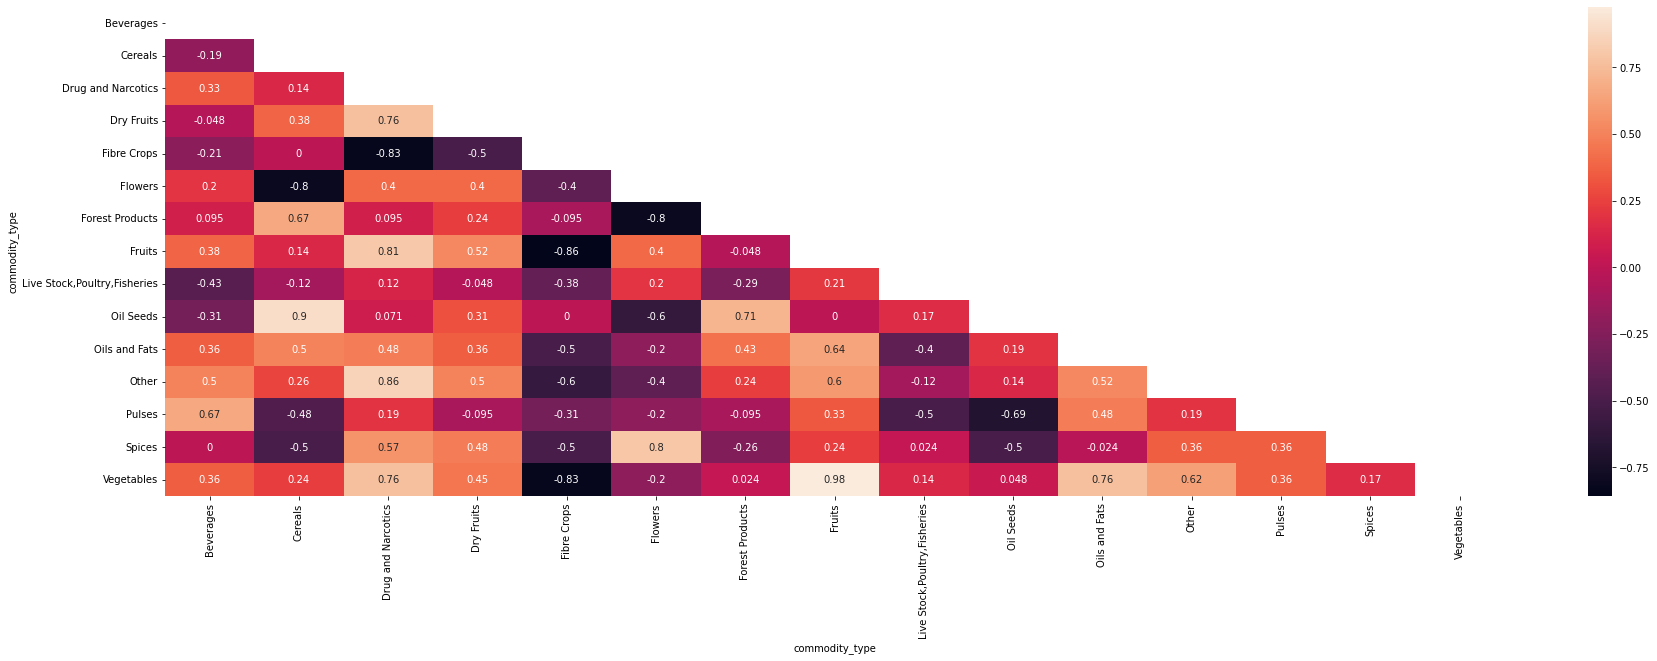

In [30]:
type_corr=df.groupby(['month','commodity_type'])['modal_price'].aggregate('mean').unstack()
plt.subplots(figsize=(30, 9))
mask=np.triu(np.ones_like(type_corr.corr(method='spearman')))
sns.heatmap(type_corr.corr(method='spearman'), annot = True,mask=mask)

> 1. Vegetables and fruits are strongly correlated.
> 2. Fibre Crops show negtaive correlation with most of the commdities yet no correlation with Oil seeds and Cereals.
> 3. Oil Seeds are strongly correlated with cereals.
> 4.

<AxesSubplot:xlabel='state', ylabel='state'>

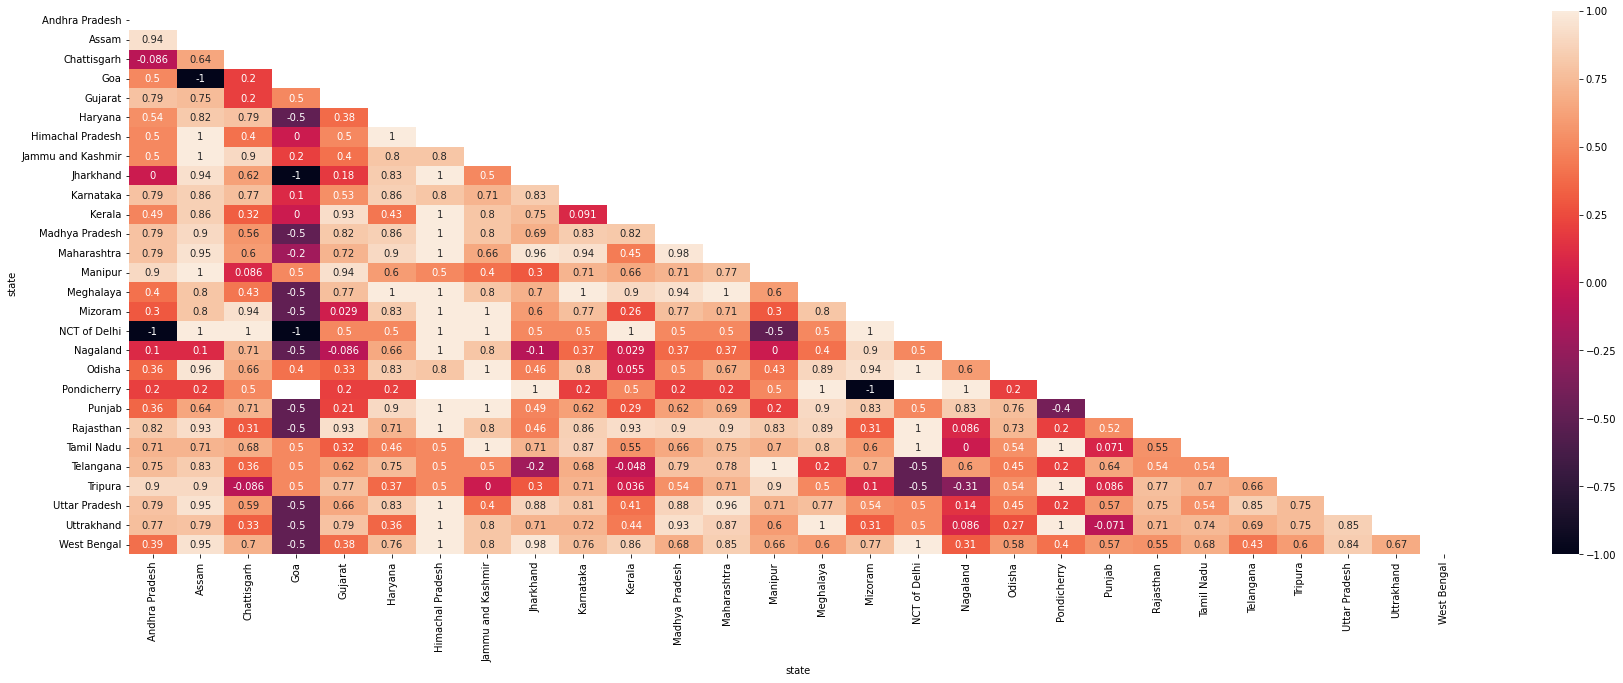

In [31]:
state_type_corr=df.groupby(['commodity_type','state'])['modal_price'].aggregate('mean').unstack()
plt.subplots(figsize=(30, 10))
mask=np.triu(np.ones_like(state_type_corr.corr(method='spearman')))
sns.heatmap(state_type_corr.corr(method='spearman'), annot = True,mask=mask)

<AxesSubplot:xlabel='zone', ylabel='zone'>

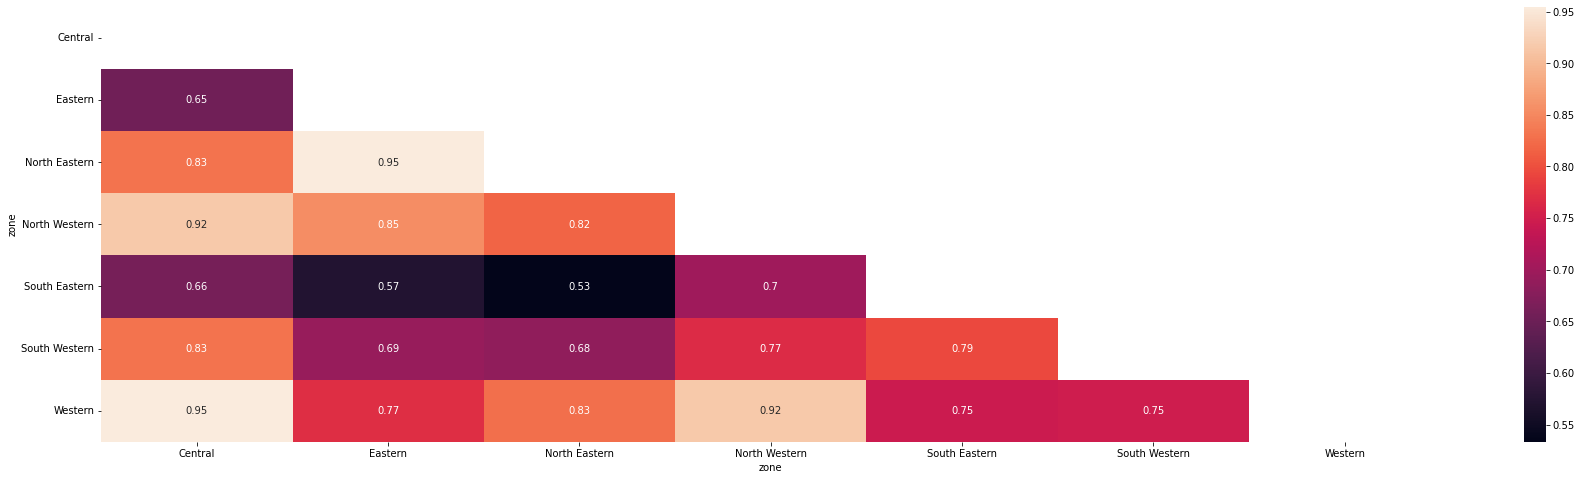

In [32]:
zone_type_corr=df.groupby(['commodity_type','zone'])['modal_price'].aggregate('mean').unstack()
plt.subplots(figsize=(30, 8))
mask=np.triu(np.ones_like(zone_type_corr.corr(method='spearman')))
sns.heatmap(zone_type_corr.corr(method='spearman'), annot = True,mask=mask)

1. Most of the zone prices are related with their adjacent zones.
2. Apart from this relation, South Western Zone shows strongest correlation with Central Region.
3. The least correlating zones are North East and South East.
4. South Eastern Zone on average is the least correlated zone with others.